In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
from tqdm import tqdm
import pickle
import numba

In [4]:
import pandas as pd
import random

class DataStructureForRecommendation:
    def __init__(self, path):
        self.ratings = pd.read_csv(path)
        self.user_to_idx = {}
        self.movie_to_idx = {}
        self.idx_to_user = []
        self.idx_to_movie = []
        self.data_by_user_idx = []
        self.data_by_movie_idx = []
        
        for index, user_id, movie_id, rating, timestamp in self.ratings.itertuples():
            if user_id not in self.user_to_idx:
                self.user_to_idx[user_id] = len(self.idx_to_user)
                self.idx_to_user.append(user_id)
                self.data_by_user_idx.append([])
                
            self.data_by_user_idx[self.user_to_idx[user_id]].append((movie_id, rating))
            
            if movie_id not in self.movie_to_idx:
                self.movie_to_idx[movie_id] = len(self.idx_to_movie)
                self.idx_to_movie.append(movie_id)
                self.data_by_movie_idx.append([])
                
            self.data_by_movie_idx[self.movie_to_idx[movie_id]].append((user_id, rating))

    def get_movie(self, movie_id):
        return self.data_by_movie_idx[self.movie_to_idx[movie_id]]

    def get_user(self, user_id):
        return self.data_by_user_idx[self.user_to_idx[user_id]]

    def get_all_users_list(self):
        return self.data_by_user_idx

    def get_all_movies_list(self):
        return self.data_by_movie_idx

    def get_user_from_index(self, user):
        return self.user_to_idx

    def get_movie_from_index(self, movie):
        return self.movie_to_idx

    def get_train_test_user(self):
        data_by_users = self.data_by_user_idx
        train_data = []
        test_data = []
        
        for i in range(len(data_by_users)):
            train_data.append([])
            test_data.append([])
            for j in range(len(data_by_users[i])):
                ran = random.uniform(0, 1)
                if ran >= 0.9:
                    test_data[i].append(data_by_users[i][j])
                else:
                    train_data[i].append(data_by_users[i][j])
                    
        return train_data, test_data

    def get_train_test_movies(self):
        data_by_movies = self.data_by_movie_idx
        train_data = []
        test_data = []
        
        for i in range(len(data_by_movies)):
            train_data.append([])
            test_data.append([])
            for j in range(len(data_by_movies[i])):
                ran = random.uniform(0, 1)
                if ran >= 0.9:
                    test_data[i].append(data_by_movies[i][j])
                else:
                    train_data[i].append(data_by_movies[i][j])
                    
        return train_data, test_data


In [5]:
dataset = DataStructureForRecommendation('/var/autofs/misc/home/omer/Downloads/ml-25m/ratings.csv')

data_by_user = dataset.get_all_users_list()
data_by_movie = dataset.get_all_movies_list()

movie_train_data, movie_test_data = dataset.get_train_test_movies()
user_train_data, user_test_data = dataset.get_train_test_user()

movie_to_idx = dataset.get_movie_from_index(1)
user_to_idx = dataset.get_user_from_index(1)


Data preperation and understanding

/tmp/ipykernel_52990/2641420423.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  movie_degree = pd.value_counts(movie_degree)
/tmp/ipykernel_52990/2641420423.py:12: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  movie_degree = pd.value_counts(movie_degree)
/tmp/ipykernel_52990/2641420423.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  user_degree = pd.value_counts(user_degree)
/tmp/ipykernel_52990/2641420423.py:13: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  user_degree = pd.value_counts(user_degree)


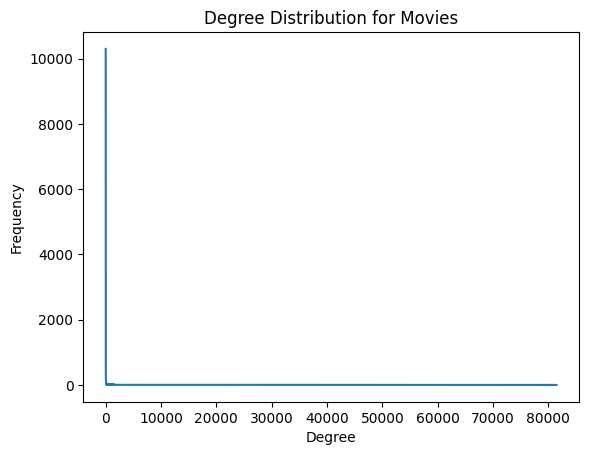

In [4]:
movielist_sorted = sorted(data_by_movie, key=len, reverse=True)
userlist_sorted = sorted(data_by_user, key=len, reverse=True)

user_degree = []
for user in userlist_sorted:
    user_degree.append(len(user))

movie_degree = []
for movie in movielist_sorted:
    movie_degree.append(len(movie))

movie_degree = pd.value_counts(movie_degree)
user_degree = pd.value_counts(user_degree)

fig, axes = plt.subplots()
axes.set_xlabel('Degree')
axes.set_ylabel('Frequency')
axes.set_title('Degree Distribution for Movies')
axes.plot(movie_degree)

plt.savefig('movies_degree.svg')


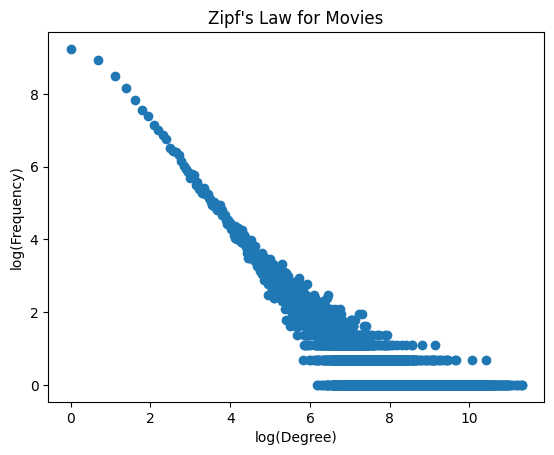

In [5]:
x = movie_degree.index
y = movie_degree.values

fig, axes = plt.subplots()
axes.scatter(np.log(x), np.log(y))
axes.set_xlabel('log(Degree)')
axes.set_ylabel('log(Frequency)')
axes.set_title("Zipf's Law for Movies")

plt.savefig("movies_degree_log.svg")


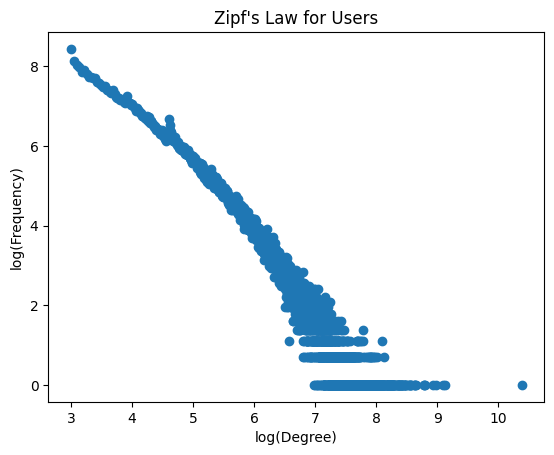

In [6]:
x = user_degree.index
y = user_degree.values

fig, axes = plt.subplots()
axes.scatter(np.log(x), np.log(y))
axes.set_xlabel('log(Degree)')
axes.set_ylabel('log(Frequency)')
axes.set_title("Zipf's Law for Users")

plt.savefig("users_degree_log.svg")


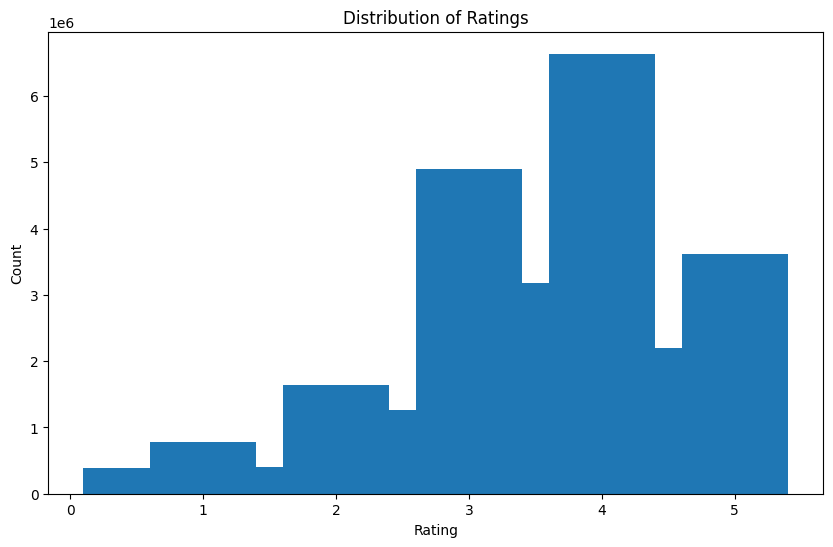

In [7]:
ratings_count = dataset.ratings['rating'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(ratings_count.index, ratings_count.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

plt.savefig("dist_of_rating.svg")
plt.show()


In [ ]:
movies = pd.read_csv("/var/autofs/misc/home/omer/Downloads/ml-25m/movies.csv")
ratings = dataset.ratings
movies_and_ratings = ratings.merge(movies, on='movieId')

drama_movies_ratings = movies_and_ratings['rating'].loc[movies_and_ratings['genres'] == 'Drama'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(drama_movies_ratings.index, drama_movies_ratings.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Drama Movies Ratings')

plt.savefig("dist_of_drama_movies.svg")
plt.show()


In [ ]:
comedy_movies_ratings = movies_and_ratings['rating'].loc[movies_and_ratings['genres'] == 'Comedy'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(comedy_movies_ratings.index, comedy_movies_ratings.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Comedy Movies Ratings')

plt.savefig("dist_of_comedy_movies.svg")
plt.show()


ALS with biases only

In [12]:
def calculate_bias(bias_type):
    if bias_type == "user":
        for i in range(len(user_train_data)):
            bias_sum = 0
            item_counter = 0
            for j in range(len(user_train_data[i])):
                if user_train_data[i][j] == ():
                    continue

                movie_id = user_train_data[i][j][0]
                actual_rating = user_train_data[i][j][1]
                movie_index = movie_to_idx[movie_id]
                bias_sum += lambd * (actual_rating - movies_biases[movie_index])
                item_counter += 1

            if item_counter > 0:
                bias = bias_sum / ((lambd * item_counter) + gamma)
                users_biases[i] = bias

        return users_biases
    else:
        for i in range(len(movie_train_data)):
            bias_sum = 0
            item_counter = 0
            for j in range(len(movie_train_data[i])):
                if movie_train_data[i][j] == ():
                    continue

                user_id = movie_train_data[i][j][0]
                actual_rating = movie_train_data[i][j][1]
                user_index = user_to_idx[user_id]

                bias_sum += lambd * (actual_rating - users_biases[user_index])
                item_counter += 1

            if item_counter > 0:
                bias = bias_sum / ((lambd * item_counter) + gamma)
                movies_biases[i] = bias

        return movies_biases


def calculate_loss():
    loss = 0
    n = 0

    for i in range(len(user_train_data)):
        for j in range(len(user_train_data[i])):
            if user_train_data[i][j] == ():
                continue

            movie_id = user_train_data[i][j][0]
            actual_rating = user_train_data[i][j][1]
            movie_index = movie_to_idx[movie_id]

            predicted_rating = users_biases[i] + movies_biases[movie_index]
            error = actual_rating - predicted_rating
            loss += error ** 2
            n += 1

    return loss / n


def calculate_loss_test():
    loss = 0
    n = 0

    for i in range(len(user_test_data)):
        for j in range(len(user_test_data[i])):
            if user_test_data[i][j] == ():
                continue

            movie_id = user_test_data[i][j][0]
            actual_rating = user_test_data[i][j][1]
            movie_index = movie_to_idx[movie_id]

            predicted_rating = users_biases[i] + movies_biases[movie_index]
            error = actual_rating - predicted_rating
            loss += error ** 2
            n += 1

    return loss / n


def calculate_rmsq_test():
    rmsq = 0
    n = 0

    for i in range(len(user_test_data)):
        for j in range(len(user_test_data[i])):
            if user_test_data[i][j] == ():
                continue

            movie_id = user_test_data[i][j][0]
            movie_index = movie_to_idx[movie_id]
            actual_rating = user_test_data[i][j][1]
            predicted_rating = users_biases[i] + movies_biases[movie_index]

            error = actual_rating - predicted_rating
            rmsq += error ** 2
            n += 1

    rmsq = np.sqrt(rmsq / n)
    return n, rmsq


def calculate_rmsq():
    rmsq = 0
    n = 0

    for i in range(len(user_train_data)):
        for j in range(len(user_train_data[i])):
            if user_train_data[i][j] == ():
                continue

            movie_id = user_train_data[i][j][0]
            movie_index = movie_to_idx[movie_id]
            actual_rating = user_train_data[i][j][1]
            predicted_rating = users_biases[i] + movies_biases[movie_index]

            error = actual_rating - predicted_rating
            rmsq += error ** 2
            n += 1

    rmsq = np.sqrt(rmsq / n)
    return n, rmsq


In [16]:
loss_values_test = []
rmsq_values_test = []
loss_values = []
rmsq_values = []

repeat = 10
lambd = 0.1
gamma = 0.1

users_biases = np.zeros(len(user_train_data))
movies_biases = np.zeros(len(movie_train_data))

for _ in tqdm(range(repeat)):
    calculate_bias(bias_type="user")
    print("end of user bias")

    calculate_bias(bias_type="movie")
    print("end of movie bias")

    loss = calculate_loss()
    loss_values.append((lambd / 2) * loss)

    print("end of loss train")

    n, rmsq = calculate_rmsq()
    rmsq_values.append(rmsq)

    print("end of rmsq train")

    loss_test = calculate_loss_test()
    loss_values_test.append((lambd / 2) * loss_test)

    print("end of loss test")

    n_test, rmsq_test = calculate_rmsq_test()
    rmsq_values_test.append(rmsq_test)

    print(f'epoch {_} : loss train {loss}, loss test {loss_test}, rmsq {rmsq}, rmsq test {rmsq_test}')


  0%|                                                    | 0/10 [00:00<?, ?it/s]

end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test


 10%|████▍                                       | 1/10 [00:36<05:27, 36.39s/it]

epoch 0 : loss train 0.7490626154156674, loss test 0.7603320760513548, rmsq 0.8654840353326383, rmsq test 0.8719702265853776
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test


 20%|████████▊                                   | 2/10 [01:05<04:18, 32.36s/it]

epoch 1 : loss train 0.7251091694905598, loss test 0.7362752768306642, rmsq 0.8515334224154445, rmsq test 0.8580648441875848
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test


 30%|█████████████▏                              | 3/10 [01:36<03:41, 31.58s/it]

epoch 2 : loss train 0.7242340291966131, loss test 0.7354184954091985, rmsq 0.851019405887206, rmsq test 0.8575654467206562
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test


 40%|█████████████████▌                          | 4/10 [02:04<03:01, 30.28s/it]

epoch 3 : loss train 0.7241689853010441, loss test 0.7353552970632544, rmsq 0.8509811897457218, rmsq test 0.8575285983938112
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test


 50%|██████████████████████                      | 5/10 [02:34<02:30, 30.05s/it]

epoch 4 : loss train 0.7241321515278069, loss test 0.7353171348429723, rmsq 0.8509595475272645, rmsq test 0.8575063468237261
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test


 60%|██████████████████████████▍                 | 6/10 [03:04<01:59, 29.95s/it]

epoch 5 : loss train 0.7241028070087583, loss test 0.7352865857216361, rmsq 0.8509423053349494, rmsq test 0.8574885338718158
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test


 70%|██████████████████████████████▊             | 7/10 [03:34<01:29, 29.90s/it]

epoch 6 : loss train 0.7240787340387173, loss test 0.7352617233900965, rmsq 0.8509281603277196, rmsq test 0.8574740365690944
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test


 80%|███████████████████████████████████▏        | 8/10 [04:03<00:59, 29.78s/it]

epoch 7 : loss train 0.7240578268318305, loss test 0.7352403007394817, rmsq 0.8509158752966303, rmsq test 0.8574615447584117
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test


 90%|███████████████████████████████████████▌    | 9/10 [04:32<00:29, 29.62s/it]

epoch 8 : loss train 0.7240388217340682, loss test 0.7352209316051793, rmsq 0.8509047077869931, rmsq test 0.8574502502216553
end of user bias
end of movie bias
end of loss train
end of rmsq train
end of loss test


100%|███████████████████████████████████████████| 10/10 [05:02<00:00, 30.21s/it]

epoch 9 : loss train 0.7240210830953328, loss test 0.735202911949733, rmsq 0.8508942843240473, rmsq test 0.8574397424599194


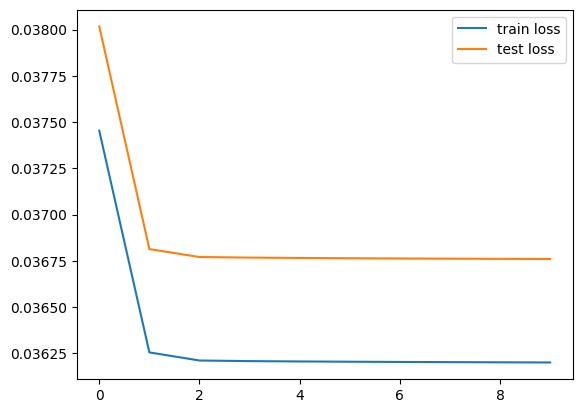

In [17]:
plt.plot(loss_values, label="Train loss")
plt.plot(loss_values_test, label="Test loss")
plt.legend(['train loss', 'test loss'])
plt.savefig('loss_without_factors.svg')


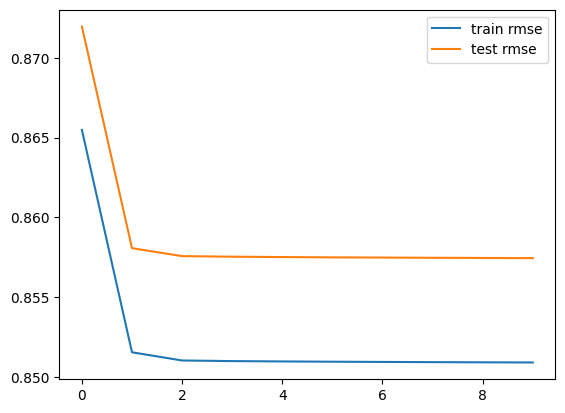

In [18]:
plt.plot(rmsq_values)
plt.plot(rmsq_values_test)
plt.legend(['train rmse', 'test rmse'])
plt.savefig('rmse_without_factors.svg')


Hyper-parameter Selection

In [ ]:
lambda_values = [0.01, 0.1, 0.2, 0.5]
gamma_values = [0.01, 0.1, 0.2]
tau_values = [0.5, 1, 2]  

best_rmse = float('inf')
best_params = (None, None, None)  
best_loss_values = []
best_rmsq_values = []

for lambd in lambda_values:
    for gamma in gamma_values:
        for tau in tau_values:
            print(f'Training with λ={lambd}, γ={gamma}, τ={tau}')

            loss_values_test = []
            rmsq_values_test = []
            loss_values = []
            rmsq_values = []

            users_biases = np.zeros(len(user_train_data))
            movies_biases = np.zeros(len(movie_train_data))

            for _ in tqdm(range(repeat)):
                calculate_bias(bias_type="user")
                calculate_bias(bias_type="movie")

                loss = calculate_loss()
                loss_values.append((lambd / 2) * loss)

                n, rmsq = calculate_rmsq()
                rmsq_values.append(rmsq)

                loss_test = calculate_loss_test()
                loss_values_test.append((lambd / 2) * loss_test)

                n_test, rmsq_test = calculate_rmsq_test()
                rmsq_values_test.append(rmsq_test)

                print(f'epoch {_} : loss train {loss} , loss test {loss_test}  rmsq {rmsq}  rmsq test {rmsq_test} ')

            avg_rmsq = np.mean(rmsq_values_test)

            if avg_rmsq < best_rmse:
                best_rmse = avg_rmsq
                best_params = (lambd, gamma, tau) 
                best_loss_values = loss_values
                best_rmsq_values = rmsq_values

print(f'Best parameters: λ = {best_params[0]}, γ = {best_params[1]}, τ = {best_params[2]}, Average RMSE = {best_rmse}')


In [ ]:
K_values = [0, 2, 4, 8, 16, 32]

best_rmse = float('inf')
best_k = None
rmse_results = []

for K in K_values:
    print(f'Training with K={K}')
    
    users_latent = np.random.normal(0, 1 / np.sqrt(K), size=(K, len(user_train_data)))
    movies_latent = np.random.normal(0, 1 / np.sqrt(K), size=(K, len(movie_train_data)))

    loss_values_test = []
    rmsq_values_test = []
    loss_values = []
    rmsq_values = []

    for _ in tqdm(range(repeat)):
        calculate_bias(bias_type="user")
        calculate_bias(bias_type="movie")

        loss = calculate_loss()
        loss_values.append((lambd / 2) * loss)

        n, rmsq = calculate_rmsq()
        rmsq_values.append(rmsq)

        loss_test = calculate_loss_test()
        loss_values_test.append((lambd / 2) * loss_test)

        n_test, rmsq_test = calculate_rmsq_test()
        rmsq_values_test.append(rmsq_test)

    avg_rmsq = np.mean(rmsq_values_test)
    rmse_results.append((K, avg_rmsq))

    if avg_rmsq < best_rmse:
        best_rmse = avg_rmsq
        best_k = K

print(f'Best K: {best_k}, with Average RMSE: {best_rmse}')

import matplotlib.pyplot as plt

ks, rmses = zip(*rmse_results)
plt.plot(ks, rmses, marker='o')
plt.xlabel('Number of Latent Dimensions (K)')
plt.ylabel('Average RMSE')
plt.title('RMSE vs Number of Latent Dimensions')
plt.grid()
plt.show()


ALS with latent factors and biases

In [ ]:
def calculate_bias(bias_type):
    if bias_type == "user":
        for i in range(len(user_train_data)):
            bias_sum = 0
            item_counter = 0
            for j in range(len(user_train_data[i])):
                if user_train_data[i][j] == ():
                    continue

                movie_id = user_train_data[i][j][0]
                actual_rating = user_train_data[i][j][1]
                movie_index = movie_to_idx[movie_id]
                bias_sum += lambd * (
                    actual_rating - (
                        np.dot(np.transpose(users_latent[:, i]), movies_latent[:, movie_index]) +
                        movies_biases[movie_index]
                    )
                )
                item_counter += 1

            if item_counter > 0:
                bias = bias_sum / ((lambd * item_counter) + gamma)
                users_biases[i] = bias

        return users_biases

    else:
        for i in range(len(movie_train_data)):
            bias_sum = 0
            item_counter = 0
            for j in range(len(movie_train_data[i])):
                if movie_train_data[i][j] == ():
                    continue

                user_id = movie_train_data[i][j][0]
                actual_rating = movie_train_data[i][j][1]
                user_index = user_to_idx[user_id]

                bias_sum += lambd * (
                    actual_rating - (
                        np.dot(np.transpose(movies_latent[:, i]), users_latent[:, user_index]) +
                        users_biases[user_index]
                    )
                )
                item_counter += 1

            if item_counter > 0:
                bias = bias_sum / ((lambd * item_counter) + gamma)
                movies_biases[i] = bias

        return movies_biases


def calculate_loss():
    loss = 0
    n = 0

    for i in range(len(user_train_data)):
        for j in range(len(user_train_data[i])):
            if user_train_data[i][j] == ():
                continue

            movie_id = user_train_data[i][j][0]
            actual_rating = user_train_data[i][j][1]
            movie_index = movie_to_idx[movie_id]

            predicted_rating = (
                np.dot(users_latent[:, i], np.transpose(movies_latent[:, movie_index])) +
                users_biases[i] + movies_biases[movie_index]
            )

            error = actual_rating - predicted_rating
            loss += error ** 2
            n += 1
            
    return loss / n


def calculate_loss_test():
    loss = 0
    n = 0

    for i in range(len(user_test_data)):
        for j in range(len(user_test_data[i])):
            if user_test_data[i][j] == ():
                continue

            movie_id = user_test_data[i][j][0]
            actual_rating = user_test_data[i][j][1]
            movie_index = movie_to_idx[movie_id]

            predicted_rating = (
                np.dot(users_latent[:, i], np.transpose(movies_latent[:, movie_index])) +
                users_biases[i] + movies_biases[movie_index]
            )

            error = actual_rating - predicted_rating
            loss += error ** 2
            n += 1

    return loss / n


def calculate_rmsq_test():
    rmsq = 0
    n = 0

    for i in range(len(user_test_data)):
        for j in range(len(user_test_data[i])):
            if user_test_data[i][j] == ():
                continue

            movie_id = user_test_data[i][j][0]
            movie_index = movie_to_idx[movie_id]
            actual_rating = user_test_data[i][j][1]

            predicted_rating = (
                np.dot(users_latent[:, i], np.transpose(movies_latent[:, movie_index])) +
                users_biases[i] + movies_biases[movie_index]
            )

            error = actual_rating - predicted_rating
            rmsq += error ** 2
            n += 1

    rmsq = np.sqrt(rmsq / n)
    return n, rmsq


def calculate_rmsq():
    rmsq = 0
    n = 0

    for i in range(len(user_train_data)):
        for j in range(len(user_train_data[i])):
            if user_train_data[i][j] == ():
                continue

            movie_id = user_train_data[i][j][0]
            movie_index = movie_to_idx[movie_id]
            actual_rating = user_train_data[i][j][1]

            predicted_rating = (
                np.dot(users_latent[:, i], np.transpose(movies_latent[:, movie_index])) +
                users_biases[i] + movies_biases[movie_index]
            )

            error = actual_rating - predicted_rating
            rmsq += error ** 2
            n += 1

    rmsq = np.sqrt(rmsq / n)
    return n, rmsq


def update_user_latent_factors():
    for i in range(len(user_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))

        for j in range(len(user_train_data[i])):
            if user_train_data[i][j] == ():
                continue

            actual_rating = user_train_data[i][j][1]
            movie_id = user_train_data[i][j][0]
            movie_index = movie_to_idx[movie_id]
            error = actual_rating - users_biases[i] - movies_biases[movie_index]
            x += movies_latent[:, movie_index] * error
            y += np.outer(movies_latent[:, movie_index], movies_latent[:, movie_index])

        y += np.identity(factors) * taw  
        users_latent[:, i] = np.matmul(np.linalg.inv(lambd * y), lambd * x)


def update_movie_latent_factors():
    for i in range(len(movie_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))

        for j in range(len(movie_train_data[i])):
            if movie_train_data[i][j] == ():
                continue

            user_id = movie_train_data[i][j][0]
            user_index = user_to_idx[user_id]
            r = movie_train_data[i][j][1]
            error = r - movies_biases[i] - users_biases[user_index]
            x += users_latent[:, user_index] * error
            y += np.outer(users_latent[:, user_index], users_latent[:, user_index])

        y += np.identity(factors) * taw  
        movies_latent[:, i] = np.matmul(np.linalg.inv(lambd * y), lambd * x)


loss_values_test = []
rmsq_values_test = []
loss_values = []
rmsq_values = []

repeat = 5
lambd = 0.1
gamma = 0.1
taw = 1
factors = 10

users_latent = np.random.normal(0, 1 / math.sqrt(factors), size=(factors, 200948))
movies_latent = np.random.normal(0, 1 / math.sqrt(factors), size=(factors, 84432))
users_biases = np.zeros(len(user_train_data))
movies_biases = np.zeros(len(movie_train_data))

for _ in tqdm(range(repeat)):
    calculate_bias(bias_type="user")
    print("end of user bias")

    update_user_latent_factors()
    print("end of user latent")

    calculate_bias(bias_type="movie")
    print("end of movie bias")

    update_movie_latent_factors()
    print("end of movie latent")

    loss = calculate_loss()
    loss_values.append((lambd / 2) * loss)

    print("end of loss train")

    n, rmsq = calculate_rmsq()
    rmsq_values.append(rmsq)

    print("end of rmsq train")

    loss_test = calculate_loss_test()
    loss_values_test.append((lambd / 2) * loss_test)

    print("end of loss test ")

    n_test, rmsq_test = calculate_rmsq_test()
    rmsq_values_test.append(rmsq_test)

    print(f'epoch {_} : loss train {loss}, loss test {loss_test}, rmsq {rmsq}, rmsq test {rmsq_test}')


  0%|                                                     | 0/5 [00:00<?, ?it/s]

end of user bias
end of user latent
end of movie bias
end of movie latent
end of loss train
end of rmsq train
end of loss test 


 20%|████████▊                                   | 1/5 [06:47<27:09, 407.30s/it]

epoch 0 : loss train 0.68684490333706, loss test 0.7852974843962894, rmsq 0.8287610652878549, rmsq test 0.8861701215885636
end of user bias
end of user latent
end of movie bias
end of movie latent
end of loss train
end of rmsq train
end of loss test 


 40%|█████████████████▌                          | 2/5 [15:00<22:53, 457.91s/it]

epoch 1 : loss train 0.5979188949568949, loss test 0.6986671072062876, rmsq 0.7732521548349509, rmsq test 0.8358630911855647
end of user bias


In [ ]:
plt.plot(loss_values, label="Train loss")
plt.plot(loss_values_test, label="Test loss")
plt.legend(['train loss', 'test loss'])
plt.savefig('loss.svg')


In [ ]:
plt.plot(rmsq_values)
plt.plot(rmsq_values_test)
plt.legend(['train rmse', 'test rmse'])
plt.savefig('rmse.svg')


Prediction

In [ ]:
movies = pd.read_csv("/var/autofs/misc/home/omer/Downloads/ml-25m/movies.csv")
movies.loc[movies["movieId"] == 1]

def calculate_dummy_user_bias(user_dummy, iterations, dummy_user_latent):
    bias_sum = 0
    item_counter = 0
    for i in range(len(user_dummy)):
        movie_id = user_dummy[i][0]
        rating = user_dummy[i][1]
        movie_index = movie_to_idx[movie_id]
        
        if iterations == 0:
            bias_sum += lambd * (rating - movies_biases[movie_index])
        else:
            bias_sum += lambd * (rating - 
                (np.dot(np.transpose(dummy_user_latent), movies_latent[:, movie_index]) + 
                 movies_biases[movie_index]))
        
        item_counter += 1
        
    if item_counter > 0:
        bias = bias_sum / ((lambd * item_counter) + gamma)
        return bias

def update_user_latent_dummy(dummy_user, dummy_user_bias):
    x = np.zeros(factors)
    y = np.zeros((factors, factors))
    for j in range(len(dummy_user)):
        actual_rating = dummy_user[j][1]
        movie_id = dummy_user[j][0]
        movie_index = movie_to_idx[movie_id]
        error = actual_rating - dummy_user_bias - movies_biases[movie_index]
        x += movies_latent[:, movie_index] * error
        y += np.outer(np.transpose(movies_latent[:, movie_index]), movies_latent[:, movie_index])
    
    y += np.identity(factors) * taw  
    return np.matmul(np.linalg.inv(lambd * y), lambd * x)


In [ ]:
user_dummy = [(1, 4.0)]
dummy_user_latent = np.zeros(factors)

iterations = 5
for _ in tqdm(range(iterations)):
    dummy_user_bias = calculate_dummy_user_bias(user_dummy, _, dummy_user_latent)
    dummy_user_latent = update_user_latent_dummy(user_dummy, dummy_user_bias)

preds = []
for i in range(len(movie_to_idx)):
    preds.append(np.dot(np.transpose(dummy_user_latent), movies_latent[:, i]) + (0.05 * movies_biases[i]))

pred_df = pd.DataFrame(preds, columns=["predictions"])
pred_df = pred_df.sort_values("predictions", ascending=False)

idx_to_movie = dataset.idx_to_movie
best_match = list(pred_df.head(100).index)

for i in range(10):
    print(movies.loc[movies["movieId"] == idx_to_movie[best_match[i]]])


In [43]:
movies.loc[movies['title'] == "Saw (2003)"]

,movieId,title,genres
35780,148671,Saw (2003),Crime|Horror


visulaize movies latent factors 

In [9]:
import pickle

file_path = '/var/autofs/misc/home/omer/Downloads/movies_latent.pkl'

with open(file_path, 'rb') as file:
    movies_latent = pickle.load(file)

movies = pd.read_csv("/var/autofs/misc/home/omer/Downloads/ml-25m/movies.csv")


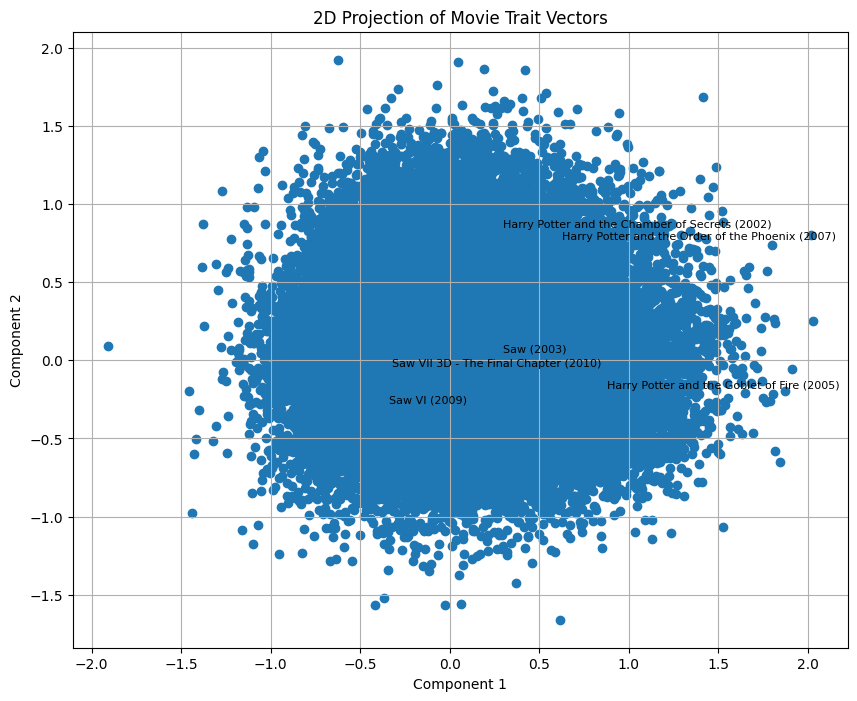

In [47]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
movie_latent_2d = pca.fit_transform(movies_latent.T)

plt.figure(figsize=(10, 8))
plt.scatter(movie_latent_2d[:, 0], movie_latent_2d[:, 1], marker='o')

selected_indices = [5704,10408,11700,13930,15466,35780] 

for i in selected_indices:
    plt.annotate(movies.iloc[i]['title'], (movie_latent_2d[i, 0], movie_latent_2d[i, 1]), fontsize=8)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Projection of Movie Trait Vectors')
plt.grid()
plt.savefig('2D_movie_trait_vectors_small.svg',dpi=1)
plt.show()


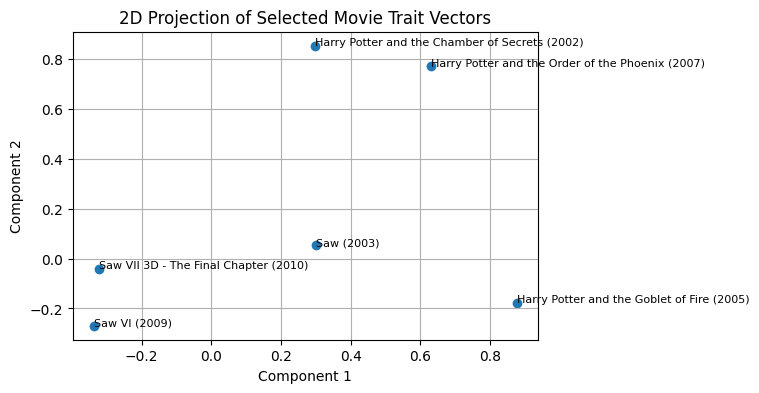

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
movie_latent_2d = pca.fit_transform(movies_latent.T)

plt.figure(figsize=(6, 4))

selected_indices = [5704,10408,11700,13930,15466,35780] 

plt.scatter(movie_latent_2d[selected_indices, 0], movie_latent_2d[selected_indices, 1], marker='o')

for i in selected_indices:
    plt.annotate(movies.iloc[i]['title'], (movie_latent_2d[i, 0], movie_latent_2d[i, 1]), fontsize=8)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Projection of Selected Movie Trait Vectors')
plt.grid()

plt.savefig('2D_movie_trait_vectors_selected.svg', dpi=100)
plt.show()


most and least polarizing movies 

In [28]:

ratings = dataset.ratings

polarization = ratings.groupby('movieId')['rating'].agg(['mean', 'std', 'count']).reset_index()

most_polarizing = polarization.sort_values(by='std', ascending=False).head(10)
least_polarizing = polarization.sort_values(by='std', ascending=True).head(10)

movies = pd.read_csv("/var/autofs/misc/home/omer/Downloads/ml-25m/movies.csv")
most_polarizing = most_polarizing.merge(movies, on='movieId')
least_polarizing = least_polarizing.merge(movies, on='movieId')

print("Most Polarizing Movies:")
print(most_polarizing[['title', 'mean', 'std', 'count']])

print("\nLeast Polarizing Movies:")
print(least_polarizing[['title', 'mean', 'std', 'count']])


Most Polarizing Movies:
                       title  mean       std  count
0     Beautiful Beast (2013)  2.75  3.181981      2
1      Itinéraire bis (2011)  2.75  3.181981      2
2        Crazy Enough (2013)  2.75  3.181981      2
3  40 Days and Nights (2012)  2.75  3.181981      2
4             Diverge (2016)  2.75  3.181981      2
5       Chemical Peel (2014)  2.75  3.181981      2
6                Carl (2012)  2.75  3.181981      2
7                 Vergeef me  2.75  3.181981      2
8        Beyond Glory (2015)  2.75  3.181981      2
9  Acting Like Adults (2014)  2.75  3.181981      2

Least Polarizing Movies:
                                               title  mean  std  count
0                   Petersburg: Only for Love (2016)   4.0  0.0      2
1                         Amsterdam Kill, The (1977)   2.5  0.0      2
2                Chronicle of a Disappearance (1996)   4.0  0.0      2
3                     Mickey Mouse in Vietnam (1968)   3.0  0.0      5
4                      